In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')

In [4]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory data analysis and visualization

In [8]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
## setting default style for chart
sns.set_style(style='darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(5,6)

In [10]:
df1.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

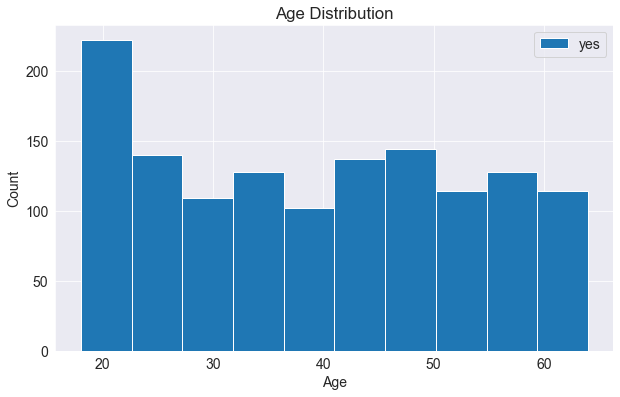

In [11]:
# visualizing age parameter
plt.hist(df1.age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend(df1.smoker)


In [69]:
fig=px.histogram(df1,x='age',color='smoker',title='Age distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [70]:
## visualizing BMI
fig=px.histogram(df1,x='bmi',title='BMI Count',color='sex')
fig.update_layout(bargap=0.1)

In [14]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [71]:
fig=px.scatter(df1,x='age',y='bmi',color='sex')
fig

In [16]:
## visualizing charges 
fig=px.histogram(df1,x='charges',color='sex',title='Sex vs Charges')
fig.update_layout(bargap=0.1)

In [17]:
fig=px.scatter(df1,x='age',y='charges',color='smoker')
fig

In [18]:
fig=px.histogram(df1,x='charges',color='smoker',title='charges vs smoker')
fig.update_layout(bargap=0.1)

In [19]:
df1.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
df1.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [21]:
fig=px.histogram(df1,x='sex',color='smoker',title='Male vs Female smokers')
fig.update_layout(bargap=0.1)

In [22]:
fig=px.scatter(df1,x='bmi',y='charges',color='smoker')
fig

## Linear regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Testing the model if the person smoker

In [24]:
df2=df1[df1.smoker=='yes']
df2.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577


In [25]:
dummies=pd.get_dummies(df2,columns=['sex','smoker','region'],drop_first=True)
dummies

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,0,1
11,62,26.290,0,27808.72510,0,0,1,0
14,27,42.130,0,39611.75770,1,0,1,0
19,30,35.300,0,36837.46700,1,0,0,1
23,34,31.920,1,37701.87680,0,0,0,0
...,...,...,...,...,...,...,...,...
1313,19,34.700,2,36397.57600,0,0,0,1
1314,30,23.655,3,18765.87545,0,1,0,0
1321,62,26.695,0,28101.33305,1,0,0,0
1323,42,40.370,2,43896.37630,0,0,1,0


In [26]:
x=dummies.drop(['charges'],axis='columns')
y=dummies.charges
y.head(3)

0     16884.9240
11    27808.7251
14    39611.7577
Name: charges, dtype: float64

## Splitting dataset into training & testing dataset

In [27]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1)

In [28]:
x_train.shape

(246, 7)

In [29]:
x_test.shape

(28, 7)

## Creating the model

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_train)
predicted
pd.DataFrame({'actual':y_train,'predicted':predicted})

,actual,predicted
185,43753.33705,48402.556809
1120,34166.27300,29800.118699
86,43578.93940,38145.859299
982,19199.94400,23947.786849
58,23244.79020,23725.179880
...,...,...
1223,26125.67477,16737.976834
641,32787.45859,29858.692896
259,33750.29180,28257.381877
543,63770.42801,59638.886947


In [31]:
model.score(x_train,y_train)

0.7647616558027233

In [32]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_log_error',cv=7)
np.mean(cvs)

-0.0412228575426311

In [33]:
model.score(x_test,y_test)

0.6568745451407036

In [34]:
y_pred=model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='charges', ylabel='Density'>

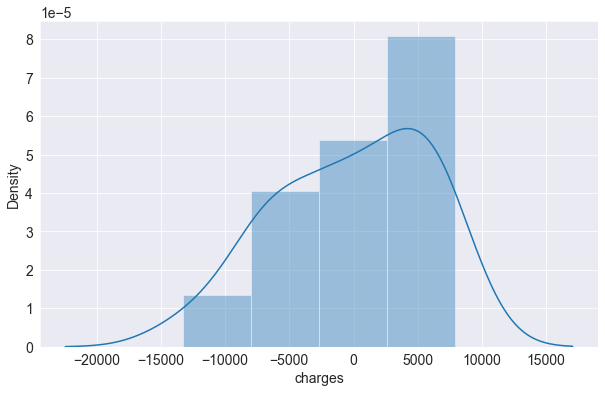

In [35]:
sns.distplot(y_pred-y_test)

In [36]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=500, max_iter=10000, tol=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=500, max_iter=10000, tol=0.001)

In [37]:
lasso_reg.score(x_train,y_train)

0.7586799107469937

In [38]:
lasso_reg.score(x_test,y_test)

0.6760339796291058

In [39]:
las_pred=lasso_reg.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='charges', ylabel='Density'>

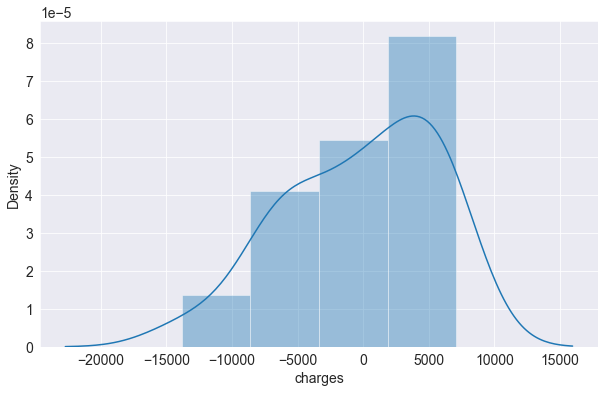

In [40]:
sns.distplot(las_pred-y_test)

In [41]:
pd.DataFrame({'predicted':las_pred,'actual':y_test,'differ':las_pred-y_test})

,predicted,actual,differ
1042,26997.101752,33475.81715,-6478.715398
0,22784.634513,16884.92400,5899.710513
587,30104.236543,43943.87610,-13839.639557
828,32800.916336,39597.40720,-6796.490864
1156,46821.846300,39722.74620,7099.100100
1030,24064.471132,21677.28345,2387.187682
1204,21636.982559,18223.45120,3413.531359
738,29286.328075,36189.10170,-6902.773625
545,27967.503193,23807.24060,4160.262593
1307,26605.656425,21472.47880,5133.177625


In [42]:
x_train.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest
185,36,41.895,3,1,0,0,0
1120,23,31.400,0,0,0,0,1
86,57,31.160,0,0,1,0,0
982,31,25.900,3,1,0,0,1
58,53,22.880,1,0,0,1,0


#### Testing the model if person is non smoker

In [43]:
df3=(df1[df1.smoker=='no'])
df3

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [44]:
d1=pd.get_dummies(df3,drop_first=True)
d1.head(3)

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
1,18,33.770,1,1725.55230,1,0,1,0
2,28,33.000,3,4449.46200,1,0,1,0
3,33,22.705,0,21984.47061,1,1,0,0


In [45]:
x1=d1.drop(['charges'],axis='columns')
x1.head(3)

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest
1,18,33.770,1,1,0,1,0
2,28,33.000,3,1,0,1,0
3,33,22.705,0,1,1,0,0


In [46]:
y1=d1.charges
y1.head(3)

1     1725.55230
2     4449.46200
3    21984.47061
Name: charges, dtype: float64

In [47]:
x1_train, x1_test, y1_train, y1_test =train_test_split(x1,y1,test_size=0.2)


In [48]:
x1_train.shape

(851, 7)

In [49]:
y1_test.shape

(213,)

In [50]:
model2=LinearRegression()
model2.fit(x1_train,y1_train)
model2.score(x1_train,y1_train)

0.3999280059769441

In [51]:
model2.score(x1_test,y1_test)

0.4658434497322226

In [52]:
from sklearn import linear_model
lasso2=linear_model.Lasso(alpha=10,max_iter=10000,tol=0.001)
lasso2.fit(x1_train,y1_train)

Lasso(alpha=10, max_iter=10000, tol=0.001)

In [53]:
lasso2.score(x1_train,y1_train)

0.39976787426910465

In [54]:
lasso2.score(x1_test,y1_test)

0.46476365318437673

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
model2.score(x_train,y_train)

0.9824102162607821

In [58]:
model2.score(x_test,y_test)

0.8575335361942882

In [59]:
from sklearn.svm import LinearSVR

In [60]:
model3=LinearSVR(C=200,max_iter=10000)
model3.fit(x_train,y_train)
model3.score(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.6733036584766308

In [61]:
model3.score(x_test,y_test)

0.5727310895907054

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
model4=GradientBoostingRegressor()
model4.fit(x_train,y_train)
model4.score(x_train,y_train)

0.9806079367117402

In [64]:
model4.score(x_test,y_test)

0.8307094007482012

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
model5=DecisionTreeRegressor(ccp_alpha=0.3,min_samples_leaf=5,min_samples_split=2)
model5.fit(x_train,y_train)
model5.score(x_train,y_train)

0.9416705156608074

In [67]:
model5.score(x_test,y_test)

0.834565294767876